In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
print("🌫🛸")

🌫🛸


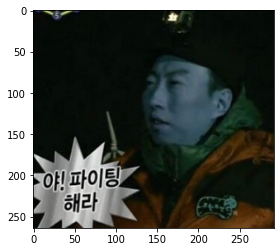

In [2]:
# 이미지 호출
my_image_path = 'camera_sticker/images/self2.png'
img_bgr = cv2.imread(my_image_path)    

img_show = img_bgr.copy()      
plt.imshow(img_bgr)
plt.show()

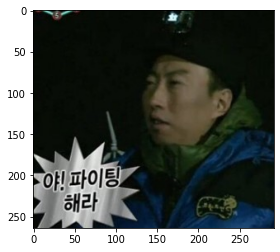

In [3]:
#RGB 값이 BRG값으로 나오는 오류 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [4]:
detector_hog = dlib.get_frontal_face_detector()

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)  



rectangles[[(103, 56) (211, 163)]]


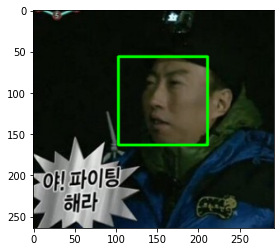

In [5]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [6]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

# print(landmark_predictor)


68


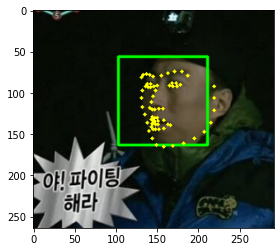

In [7]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [8]:
# print(landmark[0])

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[33]) # 코의 index는 30 입니다
    x = landmark[33][0]
    y = landmark[33][1] 

    w = h = dlib_rect.width()
    
    
#     print(len(landmark))
    print ('(x,y) : (%d,%d)'%(x,y)) # 코 위치
    print ('(w,h) : (%d,%d)'%(w,h)) # 사진 사이즈

(147, 120)
(x,y) : (147,120)
(w,h) : (109,109)


In [9]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'

img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다

img_sticker = cv2.resize(img_sticker, (w,h))# 109,109로 사이즈 조절



refined_x = x - w // 2 
print(refined_x)
refined_y = y - h // 2-5

# print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

93


(x,y) : (93,61)


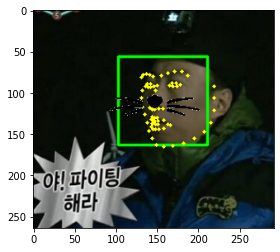

In [14]:

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], 
                        refined_x:refined_x+img_sticker.shape[1]]
#왜 더하고 다시 빼주는거지??

img_show[refined_y:refined_y+img_sticker.shape[0], 
         refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)


plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

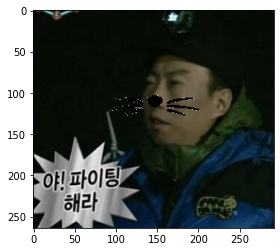

In [11]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255
             ,sticker_area, 
             img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()


In [12]:
# 처음에 고양이 배경화면이 흰색으로 출력되서 왜 그런지 한참을 고민했는데 결국 변수 위치 문제 인거같다..
# 스티커 놓을 위치 찾기가 많이 힘들었다. 
# 아직 정확히 맨 아래 이미지 출력 코드가 정확히 이해가 되지 않는다.

